In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
#不加这句话plot无法显示
import matplotlib.pyplot as plt

In [2]:
def visulize_data(data,label,title):
    z1=data[np.where(label == 1)[0]]
    z2=data[np.where(label != 1)[0]]
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(z1[:,0], z1[:,1],'r*',label = '$y = 1$')
    ax.plot(z2[:,0], z2[:,1],'*', label = '$y =-1$')
    plt.title(title)
    ax.legend(loc = 'upper left', fontsize = 'small')

In [3]:
def generate_datapoints(point_num,rad,thk,sep):
    degree = np.random.uniform(-np.pi, np.pi, (point_num,1) )
    distance=np.random.uniform(rad, rad + thk, (point_num,1) )
    pos = np.hstack((distance*np.cos(degree),distance*np.sin(degree)))
    train_label = np.sign(degree)
    bias = np.hstack((-(rad+thk/2)/2*train_label,sep/2*train_label))
    train_data = pos + bias
    train_data = np.hstack((train_data,np.ones_like(train_label)))
    return train_data,train_label

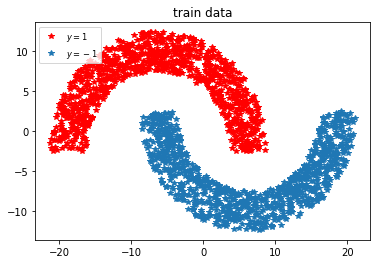

In [4]:
point_num = 2000  #generate 2000 points
rad = 10 #radius
thk = 5  #thickness
sep = -5  #seperate

train_data,train_label = generate_datapoints(point_num,rad,thk,sep)
visulize_data(train_data,train_label,'train data')

In [5]:
x1 = train_data[:,0].reshape(-1,1)
x2 = train_data[:,1].reshape(-1,1)
third_order_data = np.hstack((np.ones_like(x1),x1,x2,np.power(x1,2),np.power(x2,2),x1*x2,\
                              np.power(x1,3),np.power(x2,3),np.power(x1,2)*x2,np.power(x2,2)*x1))
third_order_data[0:2]

array([[ 1.00000000e+00,  4.60744920e+00,  1.38555664e+00,
         2.12285881e+01,  1.91976720e+00,  6.38388182e+00,
         9.78096412e+01,  2.65994619e+00,  2.94134112e+01,
         8.84522984e+00],
       [ 1.00000000e+00, -1.36757702e+01,  5.66636154e+00,
         1.87026691e+02,  3.21076532e+01, -7.74918585e+01,
        -2.55773406e+03,  1.81933571e+02,  1.05976085e+03,
        -4.39096887e+02]])

In [7]:
third_order_data_T = third_order_data.transpose()
inv_third_order = np.linalg.inv(third_order_data_T.dot(third_order_data))
w_lg = inv_third_order.dot(third_order_data_T).dot(train_label)
print('w=',w_lg)

w= [[-1.23956659e-02]
 [ 8.88392743e-02]
 [ 2.09403125e-01]
 [ 4.32330359e-05]
 [ 1.36830627e-04]
 [ 9.55738167e-05]
 [-3.95490318e-04]
 [-1.07477258e-03]
 [-5.32474984e-04]
 [-1.04149074e-03]]


In [13]:
error_num = 0
for i in range(train_data.shape[0]):
    temp = np.dot(w_lg.reshape(1,-1),third_order_data[i])
    if np.sign(temp) != np.sign(train_label[i]):
        error_num += 1
print('Ein=',error_num/point_num)

Ein= 0.0065


In [22]:
a = np.linspace(-25,25,2000)
b = np.linspace(-25,25,2000)
A,B = np.meshgrid(a,b)

x1 = A.reshape(-1,1)
x2 = B.reshape(-1,1)
xyplane = np.hstack((np.ones_like(x1),x1,x2,np.power(x1,2),np.power(x2,2),x1*x2,\
                              np.power(x1,3),np.power(x2,3),np.power(x1,2)*x2,np.power(x2,2)*x1))

z = xyplane.dot(w_lg).reshape(A.shape)


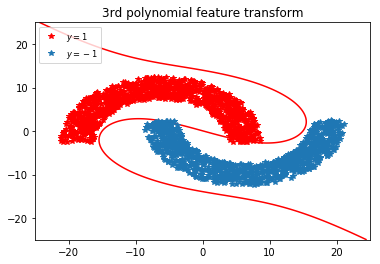

In [26]:
visulize_data(train_data,train_label,'3rd polynomial feature transform')
plt.contour(A,B,z,1,colors='red')
#plt.scatter(train_data[train_label==1][:,0],train_data[train_label==1][:,1],s=1,c='salmon')
#plt.scatter(train_data[train_label!=1][:,0],train_data[train_label!=1][:,1],s=1,c='azure')


In [27]:
w_lg.reshape(1,-1)

array([[-1.23956659e-02,  8.88392743e-02,  2.09403125e-01,
         4.32330359e-05,  1.36830627e-04,  9.55738167e-05,
        -3.95490318e-04, -1.07477258e-03, -5.32474984e-04,
        -1.04149074e-03]])